### Credit Card Fraud Detection

#### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Data Loading & Pre-processing

In [3]:
#loading dataset
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
#first 5 rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#last 5 rows
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# info about the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#the above result shows non-null which also indicates that the column has no missing values
#if it had missing values, it would show null
#checking missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of the two types of transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

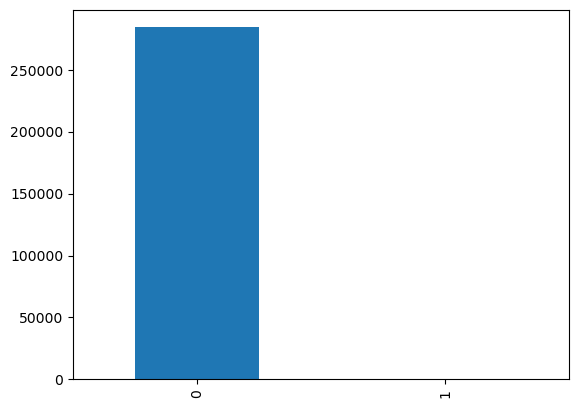

In [9]:
#visualizing it
#0:Legitimate Transaction, 1:Fraudulent Transaction
credit_card_data['Class'].value_counts().plot(kind='bar')

###### The observation here is that the dataset is highly imbalanced/unbalanced i.e., skewed which means the proportion of the two classes is not even.
###### If in a two class problems, if the data set contains 50% of one class of problem and 50% of another class of problem then it is called balanced data.
###### Here, the dataset contains huge number of legitimate transactions while a minor proportion belongs to fraudulent transactions.

#### Handling Imbalance in dataset

In [11]:
#Separating data for analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [12]:
legit.shape

(284315, 31)

In [13]:
fraud.shape

(492, 31)

In [14]:
#statistical measures of the data
legit.Amount.describe() #amount of legitimate transactions

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe() #amount of fraudulent transactions

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#comparing both type of transaction values
credit_card_data.groupby('Class').mean()
#groups by mean of each class

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


###### We use a method called 'Under Sampling' - Undersampling works by removing samples of the majority class
###### Here majority class is Legitimate (1) & minority class is Fraudulent (0)
###### While 'Over Sampling' - Oversampling works by replicating samples of the minority class through several variations of the oversampling technique

#### Undersampling

###### Build a sample dataset containing similar distribution of legitimate transactions & fraudulent transactions

###### No. of Fraudulent Transactions = 492

###### In the legit transaction datatset, we randomly take 492 transactions and then we join it with fraudulent dataset, thus we'll have equal number of both type of transactions thus balancing the entire dataset

In [19]:
legit_sample = legit.sample(n=492) #random sampling
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132556,80029.0,-1.948803,-1.835199,0.369985,-2.007140,-2.694029,-0.253596,1.697605,0.122464,-2.611650,...,0.228128,-0.263589,1.077123,0.258632,0.934120,-0.199423,-0.313112,-0.011476,603.62,0
4040,3691.0,1.216123,0.242272,0.325092,1.487331,0.063619,0.112638,-0.126977,0.005888,1.796319,...,-0.303520,-0.429628,-0.091259,-0.512968,0.667589,-0.314981,0.005985,0.000529,1.00,0
159783,112947.0,-1.195473,2.236760,-1.453331,-0.570637,0.169993,0.862499,-1.978752,-7.120870,0.369361,...,6.553225,-3.305644,1.035366,0.549865,0.689744,0.236565,0.266022,0.158331,1.98,0
10905,18706.0,1.218006,-0.420345,0.899142,-0.695603,-1.054803,-0.298452,-0.867671,0.136529,3.091501,...,-0.146195,-0.043523,-0.064242,-0.073839,0.438816,-0.717964,0.051961,0.013206,6.70,0
155393,105315.0,-0.624982,0.884409,2.250290,-0.324314,0.316138,0.198947,0.499177,-0.184345,1.261279,...,-0.258702,-0.336452,-0.361847,-0.424413,0.282874,-0.742196,-0.212668,-0.157748,11.27,0


In [22]:
#concatenating two dataframes
new_df = pd.concat([legit_sample, fraud], axis=0) #concatenating one by one by rows

In [26]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132556,80029.0,-1.948803,-1.835199,0.369985,-2.007140,-2.694029,-0.253596,1.697605,0.122464,-2.611650,...,0.228128,-0.263589,1.077123,0.258632,0.934120,-0.199423,-0.313112,-0.011476,603.62,0
4040,3691.0,1.216123,0.242272,0.325092,1.487331,0.063619,0.112638,-0.126977,0.005888,1.796319,...,-0.303520,-0.429628,-0.091259,-0.512968,0.667589,-0.314981,0.005985,0.000529,1.00,0
159783,112947.0,-1.195473,2.236760,-1.453331,-0.570637,0.169993,0.862499,-1.978752,-7.120870,0.369361,...,6.553225,-3.305644,1.035366,0.549865,0.689744,0.236565,0.266022,0.158331,1.98,0
10905,18706.0,1.218006,-0.420345,0.899142,-0.695603,-1.054803,-0.298452,-0.867671,0.136529,3.091501,...,-0.146195,-0.043523,-0.064242,-0.073839,0.438816,-0.717964,0.051961,0.013206,6.70,0
155393,105315.0,-0.624982,0.884409,2.250290,-0.324314,0.316138,0.198947,0.499177,-0.184345,1.261279,...,-0.258702,-0.336452,-0.361847,-0.424413,0.282874,-0.742196,-0.212668,-0.157748,11.27,0


In [25]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [27]:
#checking value counts again
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:>

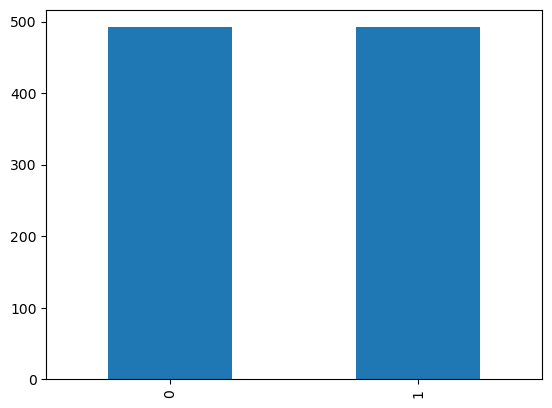

In [28]:
new_df['Class'].value_counts().plot(kind='bar')

In [29]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95229.615854,0.021617,0.091701,-0.002149,-0.030759,-0.038653,-0.004124,0.058185,0.063915,0.062622,...,-0.009586,0.000306,-0.013817,-0.011441,-0.021865,0.014618,0.021857,0.003890,-0.013207,83.050854
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [31]:
#Splitting into features and target
x = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [32]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
132556,80029.0,-1.948803,-1.835199,0.369985,-2.007140,-2.694029,-0.253596,1.697605,0.122464,-2.611650,...,0.763261,0.228128,-0.263589,1.077123,0.258632,0.934120,-0.199423,-0.313112,-0.011476,603.62
4040,3691.0,1.216123,0.242272,0.325092,1.487331,0.063619,0.112638,-0.126977,0.005888,1.796319,...,-0.311357,-0.303520,-0.429628,-0.091259,-0.512968,0.667589,-0.314981,0.005985,0.000529,1.00
159783,112947.0,-1.195473,2.236760,-1.453331,-0.570637,0.169993,0.862499,-1.978752,-7.120870,0.369361,...,-1.541752,6.553225,-3.305644,1.035366,0.549865,0.689744,0.236565,0.266022,0.158331,1.98
10905,18706.0,1.218006,-0.420345,0.899142,-0.695603,-1.054803,-0.298452,-0.867671,0.136529,3.091501,...,-0.230069,-0.146195,-0.043523,-0.064242,-0.073839,0.438816,-0.717964,0.051961,0.013206,6.70
155393,105315.0,-0.624982,0.884409,2.250290,-0.324314,0.316138,0.198947,0.499177,-0.184345,1.261279,...,0.092803,-0.258702,-0.336452,-0.361847,-0.424413,0.282874,-0.742196,-0.212668,-0.157748,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [33]:
y

132556    0
4040      0
159783    0
10905     0
155393    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Splitting into train & test data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
#stratify=y is used to evenly distribute number of legit and fraud records in test and train data
#otherwise, if not mentioned, they get randomly distributed i.e., one of them (test or train) may also have all legit or all fraud records 

In [43]:
x.shape

(984, 30)

In [44]:
x_train.shape

(787, 30)

In [45]:
x_test.shape

(197, 30)

### Model Training

In [46]:
model = LogisticRegression()

In [48]:
#training the model with training data
model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [49]:
#finding accuracy score on training data
predictions = model.predict(x_train)

In [52]:
accuracy_train = accuracy_score(predictions, y_train)
accuracy_train

0.9390088945362135

In [53]:
#predicting test data values
predictions_test = model.predict(x_test)

In [55]:
#checking accuracy of test data predictions
accuracy_test = accuracy_score(predictions_test, y_test)
accuracy_test

0.9390862944162437

###### The accuracy scores for both training & test data are close, thus the model is a great fit
###### Moreover, the accuracy score is approx 93% which implies the performance of the model is very good
